In [42]:
import os
import pandas as pd

download_folder = 'data'

events_df = pd.read_csv(os.path.join(download_folder, 'events.csv'))
category_df = pd.read_csv(os.path.join(download_folder, 'category_tree.csv'))
props1_df = pd.read_csv(os.path.join(download_folder, 'item_properties_part1.csv'))
props2_df = pd.read_csv(os.path.join(download_folder, 'item_properties_part2.csv'))

print("Datasets successfully loaded from the local 'data/' folder.")
print("\nFirst 5 rows of events.csv:")
print(events_df.head())

Datasets successfully loaded from the local 'data/' folder.

First 5 rows of events.csv:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


In [43]:
category_df = pd.read_csv(os.path.join(download_folder, 'category_tree.csv'))
props1_df = pd.read_csv(os.path.join(download_folder, 'item_properties_part1.csv'))
props2_df = pd.read_csv(os.path.join(download_folder, 'item_properties_part2.csv'))


In [44]:
category_df.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [45]:
props1_df.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [46]:
props2_df.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [47]:
import pandas as pd

def perform_basic_checks(df, df_name):
    print(f"================== Enhanced Checks for {df_name} ==================")

    print(f"\n1. Shape of {df_name}:")
    print(df.shape)

    print(f"\n2. Info of {df_name}:")
    df.info()

    print(f"\n3. Missing Values in {df_name}:")
    print(df.isnull().sum())

    print(f"\n4. Duplicate Rows in {df_name}:")
    print(df.duplicated().sum())

    print(f"\n5. Unique Values per Column in {df_name}:")
    print(df.nunique())

    print(f"\n6. Descriptive Statistics for {df_name}:")
    print(df.describe(include='all'))

    print(f"\n7. Value Counts (for columns with < 20 unique values):")
    for column in df.columns:
        if df[column].nunique() < 20:
            print(f"\n--- Column: {column} ---")
            print(df[column].value_counts())

    print("=" * (50 + len(df_name)))
    print("\n")


perform_basic_checks(category_df, 'category_df')
perform_basic_checks(events_df, 'events_df')
perform_basic_checks(props1_df, 'props1_df')
perform_basic_checks(props2_df, 'props2_df')

================== Enhanced Checks for category_df ==================

1. Shape of category_df:
(1669, 2)

2. Info of category_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB

3. Missing Values in category_df:
categoryid     0
parentid      25
dtype: int64

4. Duplicate Rows in category_df:
0

5. Unique Values per Column in category_df:
categoryid    1669
parentid       362
dtype: int64

6. Descriptive Statistics for category_df:
        categoryid     parentid
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.000000
50%     848.000000   866.000000
75%    1273.000000  1291.000000
max    1698.000000  1698.000000



In [48]:
# Combining item properties dataframes props1_df and props2_df
properties_df = pd.concat([props1_df, props2_df], ignore_index=True)

print("Shape of original props1_df:", props1_df.shape)
print("Shape of original props2_df:", props2_df.shape)
print("Shape of combined properties_df:", properties_df.shape)

Shape of original props1_df: (10999999, 4)
Shape of original props2_df: (9275903, 4)
Shape of combined properties_df: (20275902, 4)


In [49]:
properties_df.shape

(20275902, 4)

In [50]:
# Handle Duplicates in events_df
print("Original shape of events_df:", events_df.shape)
events_df.drop_duplicates(inplace=True)
print("Shape of events_df after dropping duplicates:", events_df.shape)

Original shape of events_df: (2756101, 5)
Shape of events_df after dropping duplicates: (2755641, 5)


In [51]:
# Convert Timestamp Columns to Datetime
events_df['timestamp_dt'] = pd.to_datetime(events_df['timestamp'], unit='ms')

print("Converted 'timestamp' in events_df:")
print(events_df[['timestamp', 'timestamp_dt']].head())

Converted 'timestamp' in events_df:
       timestamp            timestamp_dt
0  1433221332117 2015-06-02 05:02:12.117
1  1433224214164 2015-06-02 05:50:14.164
2  1433221999827 2015-06-02 05:13:19.827
3  1433221955914 2015-06-02 05:12:35.914
4  1433221337106 2015-06-02 05:02:17.106


In [52]:
#  Handle Missing Values in category_df
print("Missing 'parentid' values before:", category_df['parentid'].isnull().sum())
category_df['parentid'] = category_df['parentid'].fillna(-1)
print("Missing 'parentid' values after:", category_df['parentid'].isnull().sum())

Missing 'parentid' values before: 25
Missing 'parentid' values after: 0


In [53]:
# Defining the Target variable
all_visitors = pd.DataFrame(events_df['visitorid'].unique(), columns=['visitorid'])
visitors_who_purchased = events_df[events_df['event'] == 'transaction']['visitorid'].unique()
all_visitors['purchased'] = all_visitors['visitorid'].isin(visitors_who_purchased).astype(int)
visitor_df = all_visitors.copy()
print("Target variable created. Distribution:")
print(visitor_df['purchased'].value_counts())

Target variable created. Distribution:
purchased
0    1395861
1      11719
Name: count, dtype: int64


In [54]:
visitor_df.head()

,visitorid,purchased
0,257597,0
1,992329,0
2,111016,0
3,483717,0
4,951259,0


In [55]:
# Engineer Behavioral Count Features - let's count how many times each visitor performed each type of action (view, addtocart).
event_counts = events_df.groupby(['visitorid', 'event'])['timestamp'].count().unstack(fill_value=0)
event_counts.rename(columns={'view': 'view_count', 'addtocart': 'addtocart_count', 'transaction': 'transaction_count'}, inplace=True)
visitor_df = pd.merge(visitor_df, event_counts, on='visitorid', how='left')
print("\nMerged event counts. Head of the new DataFrame:")
print(visitor_df.head())


Merged event counts. Head of the new DataFrame:
   visitorid  purchased  addtocart_count  transaction_count  view_count
0     257597          0                0                  0           2
1     992329          0                0                  0          30
2     111016          0                0                  0           2
3     483717          0                0                  0           3
4     951259          0                0                  0           1


In [56]:
# Engineer Engagement Features - Go through the entire events log. For each unique visitorid, count how many different or unique itemids they have ever viewed."
unique_items_viewed = events_df.groupby('visitorid')['itemid'].nunique().reset_index()
unique_items_viewed = unique_items_viewed.rename(columns={'itemid': 'unique_items_viewed'})
visitor_df = pd.merge(visitor_df, unique_items_viewed, on='visitorid', how='left')
visitor_df['unique_items_viewed'] = visitor_df['unique_items_viewed'].fillna(0)
print(visitor_df.head())

   visitorid  purchased  addtocart_count  transaction_count  view_count  \
0     257597          0                0                  0           2   
1     992329          0                0                  0          30   
2     111016          0                0                  0           2   
3     483717          0                0                  0           3   
4     951259          0                0                  0           1   

   unique_items_viewed  
0                    2  
1                   24  
2                    1  
3                    2  
4                    1  


In [57]:
# Engineer conversion rate features
import numpy as np

visitor_df['add_to_cart_rate'] = visitor_df['addtocart_count'] / visitor_df['view_count']
visitor_df['add_to_cart_rate'] = visitor_df['add_to_cart_rate'].replace([np.inf, -np.inf], np.nan)
visitor_df['add_to_cart_rate'] = visitor_df['add_to_cart_rate'].fillna(0)
print("Added 'add_to_cart_rate'. Head of DataFrame:")
print(visitor_df[['visitorid', 'view_count', 'addtocart_count', 'add_to_cart_rate']].head())

Added 'add_to_cart_rate'. Head of DataFrame:
   visitorid  view_count  addtocart_count  add_to_cart_rate
0     257597           2                0               0.0
1     992329          30                0               0.0
2     111016           2                0               0.0
3     483717           3                0               0.0
4     951259           1                0               0.0


In [58]:
# Engineer Recency Feature - Recency measures how recently a visitor has interacted with the site
last_event_date = events_df['timestamp_dt'].max()
print(f"The analysis will be relative to the last event date: {last_event_date.date()}")

user_last_event = events_df.groupby('visitorid')['timestamp_dt'].max().reset_index()
user_last_event.rename(columns={'timestamp_dt': 'last_event_dt'}, inplace=True)

visitor_df = pd.merge(visitor_df, user_last_event, on='visitorid', how='left') # last event date as present data

visitor_df['recency_days'] = (last_event_date - visitor_df['last_event_dt']).dt.days

print("\nAdded 'recency_days'. Final DataFrame head:")
print(visitor_df.head())

The analysis will be relative to the last event date: 2015-09-18

Added 'recency_days'. Final DataFrame head:
   visitorid  purchased  addtocart_count  transaction_count  view_count  \
0     257597          0                0                  0           2   
1     992329          0                0                  0          30   
2     111016          0                0                  0           2   
3     483717          0                0                  0           3   
4     951259          0                0                  0           1   

   unique_items_viewed  add_to_cart_rate           last_event_dt  recency_days  
0                    2               0.0 2015-06-08 22:00:21.247           101  
1                   24               0.0 2015-07-30 16:23:01.735            49  
2                    1               0.0 2015-06-02 05:13:19.827           107  
3                    2               0.0 2015-06-02 05:12:35.914           107  
4                    1            

## DATA Visualization


Value counts for the 'purchased' column:
purchased
0    1395861
1      11719
Name: count, dtype: int64


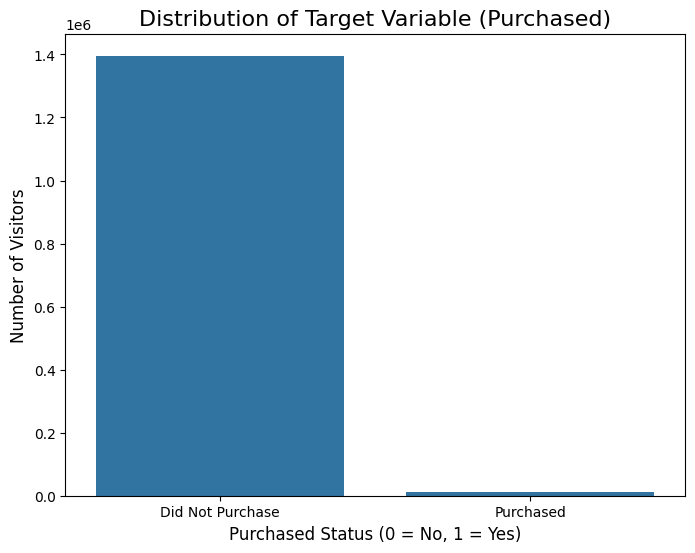

In [59]:
# Checking class imbalance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='purchased', data=visitor_df)
plt.title('Distribution of Target Variable (Purchased)', fontsize=16)
plt.xlabel('Purchased Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xticks([0, 1], ['Did Not Purchase', 'Purchased']) # Highly unbalance dataset which is normal for customer propensity

plt.savefig('class_balance.png')

print("Value counts for the 'purchased' column:")
print(visitor_df['purchased'].value_counts())

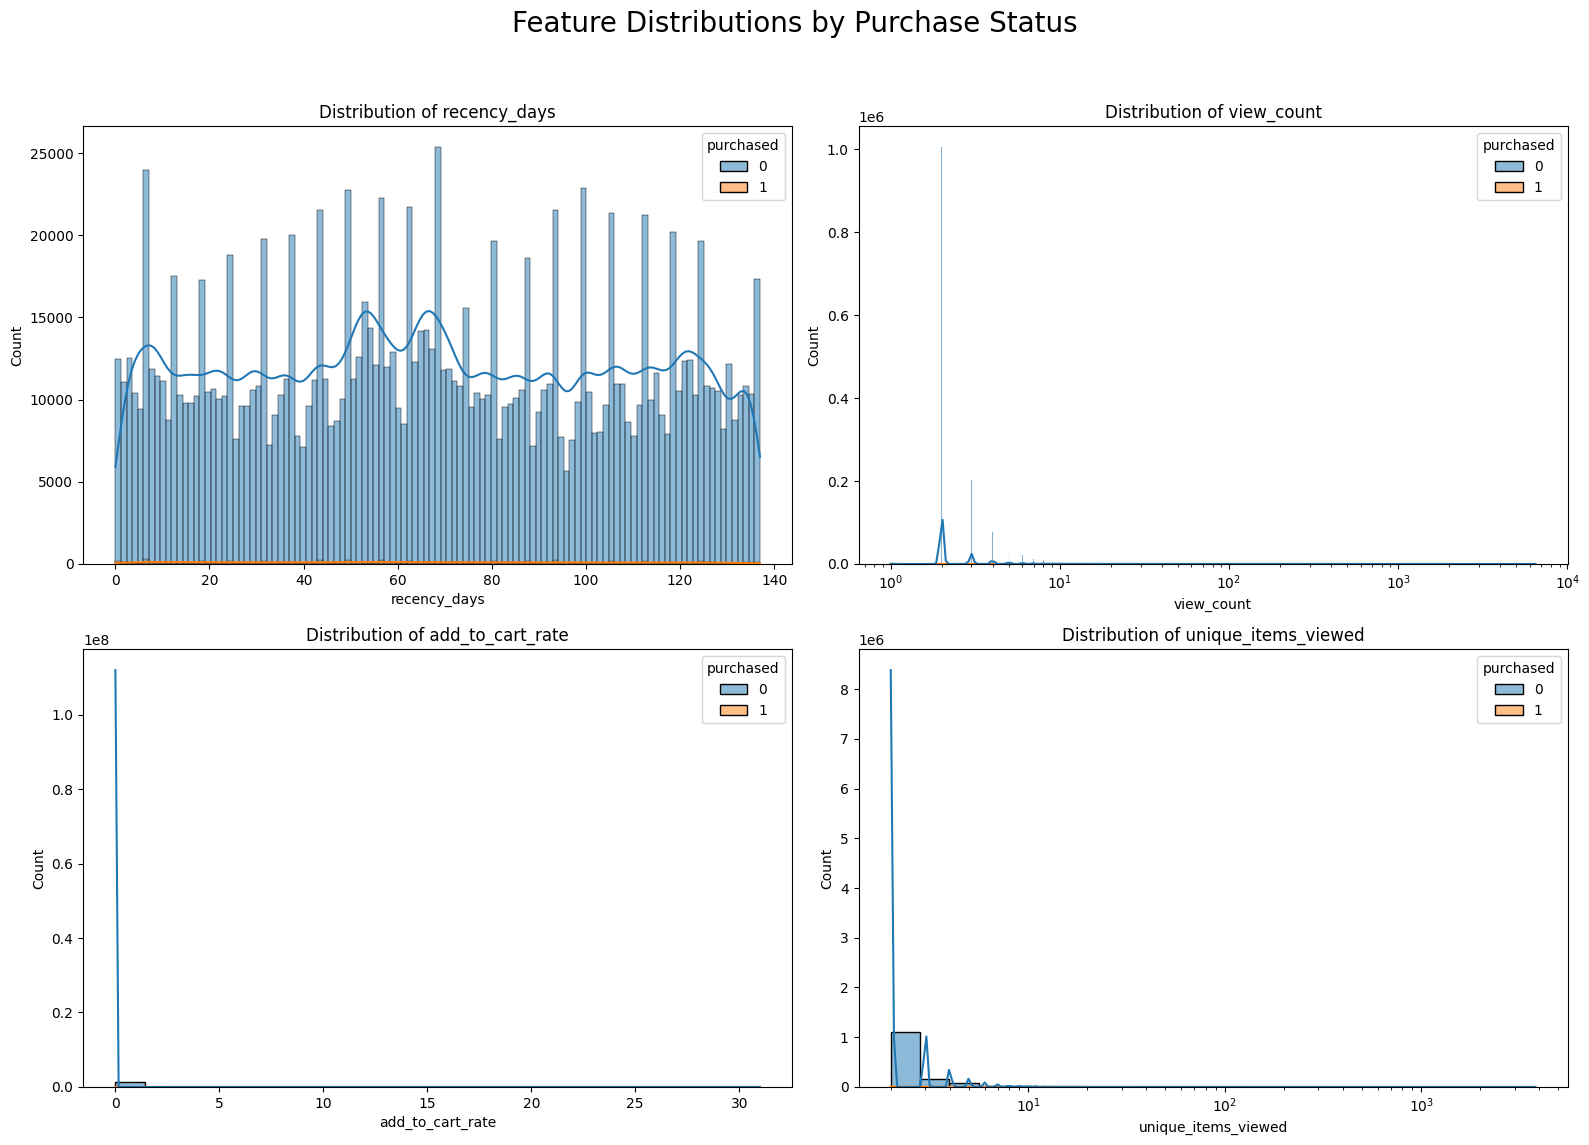

In [60]:

features_to_plot = [
    'recency_days',
    'view_count',
    'add_to_cart_rate',
    'unique_items_viewed'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Distributions by Purchase Status', fontsize=20)

axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    use_log = True if feature in ['view_count', 'unique_items_viewed'] else False

    plot_data = visitor_df[feature]
    if use_log:
        plot_data = plot_data + 1

    sns.histplot(
        data=visitor_df,
        x=plot_data,
        hue='purchased',
        kde=True,
        ax=axes[i],
        log_scale=use_log
    )
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

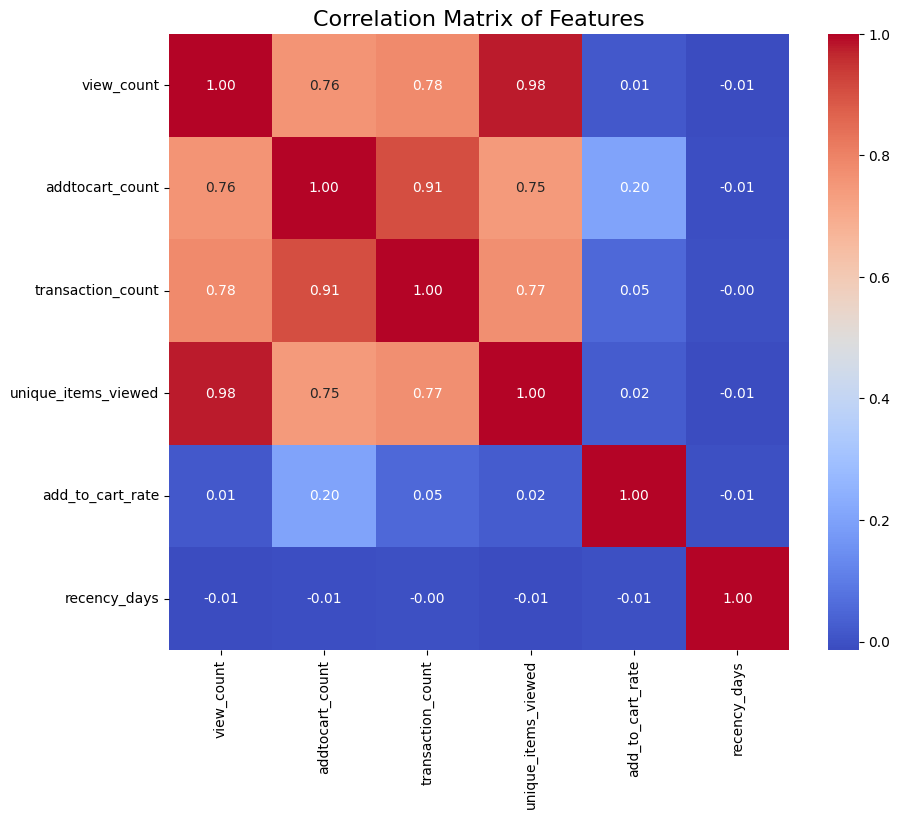

In [61]:
# Correlation Heatmap
features = [
    'view_count',
    'addtocart_count',
    'transaction_count',
    'unique_items_viewed',
    'add_to_cart_rate',
    'recency_days'
]

plt.figure(figsize=(10, 8))
correlation_matrix = visitor_df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [62]:
# Train test split
from sklearn.model_selection import train_test_split

features = [
    'view_count',
    'addtocart_count',
    'unique_items_viewed',
    'add_to_cart_rate',
    'recency_days'
]

X = visitor_df[features]
y = visitor_df['purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Original dataset purchase rate:", round(y.mean() * 100, 2), "%")
print("Training set purchase rate:", round(y_train.mean() * 100, 2), "%")
print("Testing set purchase rate:", round(y_test.mean() * 100, 2), "%")

Original dataset purchase rate: 0.83 %
Training set purchase rate: 0.83 %
Testing set purchase rate: 0.83 %


In [63]:
!pip install xgboost

In [64]:
!pip install lightgbm

In [65]:
# Training and Comparing Various Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

models = {
    "Logistic Regression": LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'
    ),
    "XGBoost": XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    ),
    "LightGBM": LGBMClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight
    )
}

for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50 + "\n")

--- Training Logistic Regression ---

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    279172
           1       0.25      0.90      0.39      2344

    accuracy                           0.98    281516
   macro avg       0.62      0.94      0.69    281516
weighted avg       0.99      0.98      0.98    281516


--- Training XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:29:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    279172
           1       0.23      0.91      0.36      2344

    accuracy                           0.97    281516
   macro avg       0.61      0.94      0.68    281516
weighted avg       0.99      0.97      0.98    281516


--- Training LightGBM ---

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    279172
           1       0.22      0.91      0.36      2344

    accuracy                           0.97    281516
   macro avg       0.61      0.94      0.67    281516
weighted avg       0.99      0.97      0.98    281516




In [66]:
!pip install optuna

In [67]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

X_train_sample = X_train.sample(frac=0.2, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

print(f"Using a sample of {len(X_train_sample)} rows for faster tuning.")

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'random_state': 42,
        'n_jobs': -1,
        'scale_pos_weight': scale_pos_weight,
        'verbose': -1,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    model = LGBMClassifier(**param)

    score = cross_val_score(
        model,
        X_train_sample,
        y_train_sample,
        cv=2,
        scoring='f1_weighted',
        n_jobs=1
    ).mean()

    return score

print("\n--- Starting FAST Hyperparameter Tuning with Optuna (CPU) ---")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=8)

print("\nBest trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

print("\n--- Evaluating the Best Model on the FULL Test Set ---")
best_params = trial.params
best_params['random_state'] = 42
best_params['scale_pos_weight'] = scale_pos_weight

final_model = LGBMClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))

[I 2025-08-28 18:30:14,431] A new study created in memory with name: no-name-3c1afe79-7789-4974-baa5-e9c2ae02cb93


Using a sample of 225213 rows for faster tuning.

--- Starting FAST Hyperparameter Tuning with Optuna (CPU) ---


[I 2025-08-28 18:30:46,821] Trial 0 finished with value: 0.9806607822259976 and parameters: {'n_estimators': 631, 'learning_rate': 0.018233556280653127, 'num_leaves': 115, 'max_depth': 11, 'min_child_samples': 37, 'subsample': 0.9189280923588844, 'reg_alpha': 0.378823628699239, 'reg_lambda': 0.5408748480609523}. Best is trial 0 with value: 0.9806607822259976.
[I 2025-08-28 18:31:30,460] Trial 1 finished with value: 0.9810356415154413 and parameters: {'n_estimators': 890, 'learning_rate': 0.24307112441398665, 'num_leaves': 105, 'max_depth': 10, 'min_child_samples': 96, 'subsample': 0.6247031965835688, 'reg_alpha': 0.8100373183548957, 'reg_lambda': 0.5082833829855616}. Best is trial 1 with value: 0.9810356415154413.
[I 2025-08-28 18:31:42,145] Trial 2 finished with value: 0.8544213545152053 and parameters: {'n_estimators': 850, 'learning_rate': 0.2731280249802199, 'num_leaves': 73, 'max_depth': 8, 'min_child_samples': 24, 'subsample': 0.8701494149485728, 'reg_alpha': 0.5523984805303531, 


Best trial:
  Value:  0.9818273878522923
  Params: 
    n_estimators: 925
    learning_rate: 0.109767918181318
    num_leaves: 136
    max_depth: 7
    min_child_samples: 26
    subsample: 0.885376472051943
    reg_alpha: 0.1507690589338938
    reg_lambda: 0.4629267962050957

--- Evaluating the Best Model on the FULL Test Set ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    279172
           1       0.23      0.87      0.36      2344

    accuracy                           0.97    281516
   macro avg       0.61      0.92      0.68    281516
weighted avg       0.99      0.97      0.98    281516



In [68]:
print(X_train.columns.tolist())

['view_count', 'addtocart_count', 'unique_items_viewed', 'add_to_cart_rate', 'recency_days']


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=3,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

print("\n--- Starting Hyperparameter Tuning for XGBoost ---")
random_search_xgb.fit(X_train, y_train)

print("\nBest Parameters Found for XGBoost:")
print(random_search_xgb.best_params_)

best_xgb = random_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("\nClassification Report for Tuned XGBoost:")
print(classification_report(y_test, y_pred_xgb_tuned))


--- Starting Hyperparameter Tuning for XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:40:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters Found for XGBoost:
{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Classification Report for Tuned XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    279172
           1       0.28      0.91      0.43      2344

    accuracy                           0.98    281516
   macro avg       0.64      0.94      0.71    281516
weighted avg       0.99      0.98      0.99    281516



In [70]:
import pandas as pd

events_df = events_df.sort_values(by=['visitorid', 'timestamp_dt'])

time_diffs = events_df.groupby('visitorid')['timestamp_dt'].diff()

session_timeout = pd.Timedelta(minutes=30)

is_new_session = (time_diffs > session_timeout) | (time_diffs.isnull())

events_df['session_id'] = is_new_session.cumsum()

print("Added 'session_id' column. Number of unique sessions found:")
print(events_df['session_id'].nunique())

Added 'session_id' column. Number of unique sessions found:
1761675


In [71]:
num_sessions = events_df.groupby('visitorid')['session_id'].nunique().reset_index()
num_sessions = num_sessions.rename(columns={'session_id': 'num_sessions'})

visitor_df = pd.merge(visitor_df, num_sessions, on='visitorid', how='left')
visitor_df['num_sessions'] = visitor_df['num_sessions'].fillna(0)


session_event_counts = events_df.groupby(['visitorid', 'session_id'])['event'].count().reset_index(name='event_count')
avg_events_per_session = session_event_counts.groupby('visitorid')['event_count'].mean().reset_index()
avg_events_per_session = avg_events_per_session.rename(columns={'event_count': 'avg_events_per_session'})

visitor_df = pd.merge(visitor_df, avg_events_per_session, on='visitorid', how='left')
visitor_df['avg_events_per_session'] = visitor_df['avg_events_per_session'].fillna(0)


print("\nNew features added to visitor_df. Here are the first few rows:")
print(visitor_df[['visitorid', 'purchased', 'num_sessions', 'avg_events_per_session']].head())


New features added to visitor_df. Here are the first few rows:
   visitorid  purchased  num_sessions  avg_events_per_session
0     257597          0             2                     1.0
1     992329          0            15                     2.0
2     111016          0             2                     1.0
3     483717          0             1                     3.0
4     951259          0             1                     1.0


In [72]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

new_features = [
    'view_count',
    'addtocart_count',
    'unique_items_viewed',
    'add_to_cart_rate',
    'recency_days',
    'num_sessions',
    'avg_events_per_session'
]

X_new = visitor_df[new_features]
y_new = visitor_df['purchased']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42, stratify=y_new
)

scale_pos_weight_new = y_train_new.value_counts()[0] / y_train_new.value_counts()[1]

best_xgb_params = {
    'subsample': 0.7,
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.01,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'scale_pos_weight': scale_pos_weight_new
}

champion_model = XGBClassifier(**best_xgb_params)

print("--- Re-training our champion model with new session features ---")
champion_model.fit(X_train_new, y_train_new)

y_pred_new = champion_model.predict(X_test_new)

print("\nClassification Report (with Session Features):")
print(classification_report(y_test_new, y_pred_new))

--- Re-training our champion model with new session features ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:41:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (with Session Features):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    279172
           1       0.31      0.94      0.47      2344

    accuracy                           0.98    281516
   macro avg       0.66      0.96      0.73    281516
weighted avg       0.99      0.98      0.99    281516



Feature Importances from our Best Model:
                  feature  importance
1         addtocart_count    0.677829
3        add_to_cart_rate    0.265121
6  avg_events_per_session    0.030480
0              view_count    0.017422
5            num_sessions    0.004553
2     unique_items_viewed    0.004451
4            recency_days    0.000144


/tmp/ipython-input-4249826080.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


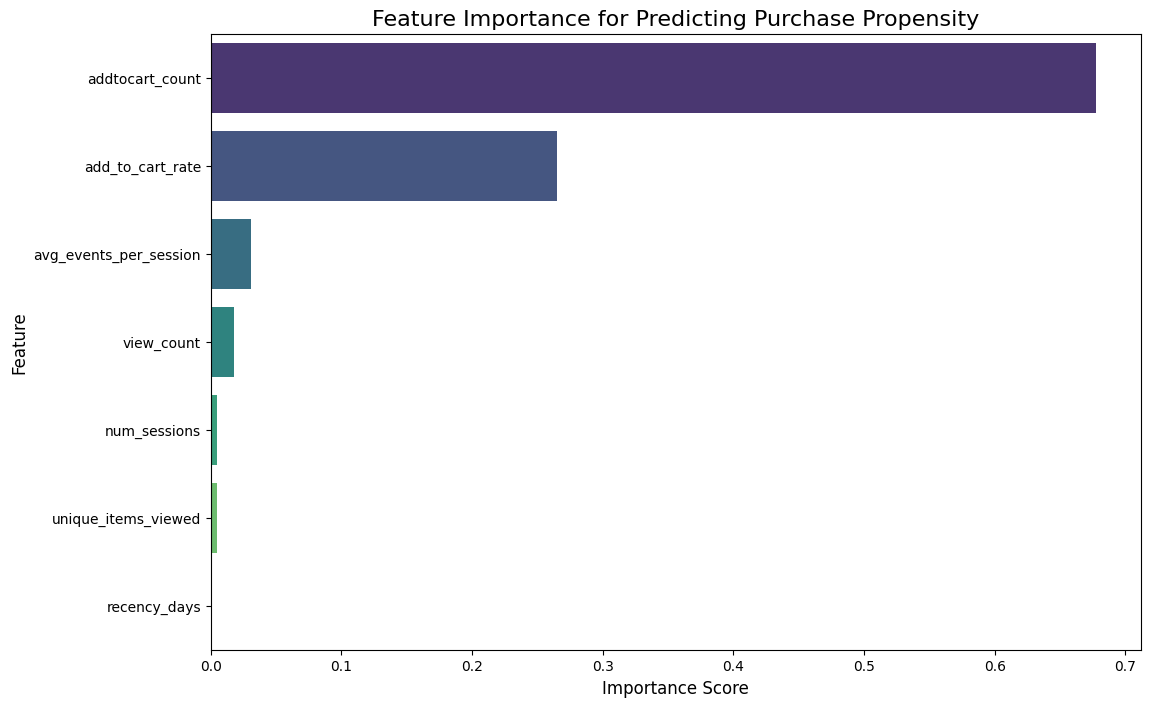

In [73]:

feature_importances = pd.DataFrame({
    'feature': new_features,
    'importance': champion_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importances from our Best Model:")
print(feature_importances)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importances,
    palette='viridis'
)
plt.title('Feature Importance for Predicting Purchase Propensity', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [74]:
!pip install imbalanced-learn

In [75]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

final_features_optimized = [
    'view_count',
    'addtocart_count',
    'unique_items_viewed',
    'add_to_cart_rate',
    'recency_days',
    'num_sessions',
    'avg_events_per_session'
]

X = visitor_df[final_features_optimized]
y = visitor_df['purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Applying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {y_train.value_counts().to_dict()}")
print(f"Resampled training set shape: {y_train_resampled.value_counts().to_dict()}")

best_xgb_params = {
    'subsample': 0.7,
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.01,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

smote_model = XGBClassifier(**best_xgb_params)

print("\n--- Training model on SMOTE-balanced data ---")
smote_model.fit(X_train_resampled, y_train_resampled)

y_pred_smote = smote_model.predict(X_test)

print("\nClassification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))

Applying SMOTE to the training data...
Original training set shape: {0: 1116689, 1: 9375}
Resampled training set shape: {0: 1116689, 1: 1116689}

--- Training model on SMOTE-balanced data ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:41:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    279172
           1       0.30      0.91      0.46      2344

    accuracy                           0.98    281516
   macro avg       0.65      0.94      0.72    281516
weighted avg       0.99      0.98      0.99    281516



In [76]:
from sklearn.metrics import accuracy_score

final_accuracy = accuracy_score(y_test, y_pred_smote)
print(f"The final model's accuracy on the test set is: {final_accuracy:.4f}")

The final model's accuracy on the test set is: 0.9820


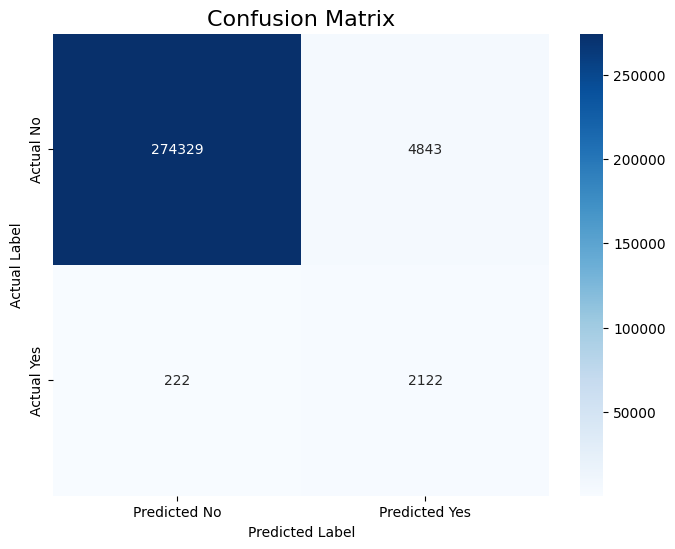

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

ROC AUC Score: 0.9890


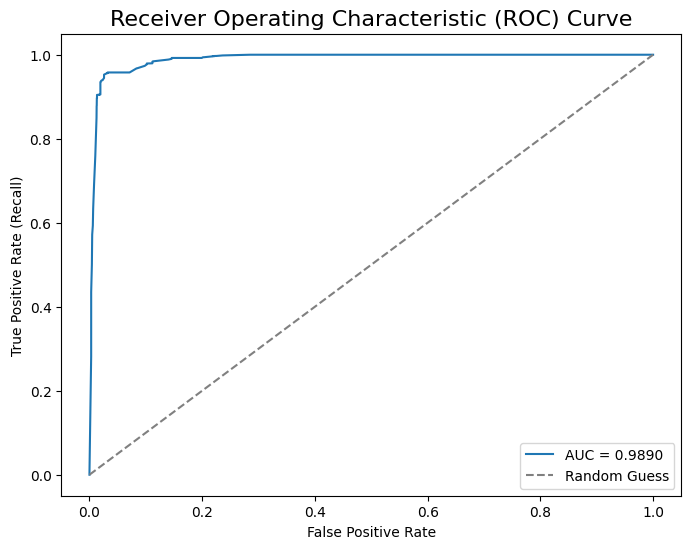

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = smote_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()


In [79]:
from sklearn.metrics import matthews_corrcoef

mcc_smote = matthews_corrcoef(y_test, y_pred_smote)
print(f"Matthews Correlation Coefficient (MCC): {mcc_smote:.4f}")

Matthews Correlation Coefficient (MCC): 0.5194


In [80]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred_new)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.5341


In [81]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

y_pred_proba =champion_model.predict_proba(X_test_new)[:, 1]

print("Threshold | Precision | Recall")
print("--------------------------------")
for threshold in np.arange(0.5, 1.0, 0.05):
    y_pred_custom = (y_pred_proba >= threshold).astype(int)

    precision = precision_score(y_test_new, y_pred_custom, zero_division=0)
    recall = recall_score(y_test_new, y_pred_custom, zero_division=0)

    print(f"  {threshold:.2f}    |   {precision:.4f}  |  {recall:.4f}")

Threshold | Precision | Recall
--------------------------------
  0.50    |   0.3114  |  0.9352
  0.55    |   0.3114  |  0.9352
  0.60    |   0.3045  |  0.9053
  0.65    |   0.3043  |  0.9044
  0.70    |   0.3646  |  0.8951
  0.75    |   0.3662  |  0.8942
  0.80    |   0.3822  |  0.7368
  0.85    |   0.0000  |  0.0000
  0.90    |   0.0000  |  0.0000
  0.95    |   0.0000  |  0.0000


In [82]:
import joblib

joblib.dump(champion_model, 'propensity_model.pkl')

print("Model successfully saved as 'propensity_model.pkl'")

Model successfully saved as 'propensity_model.pkl'


In [83]:
# Assuming 'y_test_final' and 'y_pred_final' are from your last model run
true_positives = y_test_new[(y_test_new == 1) & (y_pred_new == 1)].index
true_negatives = y_test_new[(y_test_new == 0) & (y_pred_new == 0)].index
false_negatives = y_test_new[(y_test_new == 1) & (y_pred_new == 0)].index

# Get the actual visitorid from the index
tp_visitor_id = visitor_df.loc[true_positives[0]]['visitorid']
tn_visitor_id = visitor_df.loc[true_negatives[0]]['visitorid']
fn_visitor_id = visitor_df.loc[false_negatives[0]]['visitorid']

print(f"Example True Positive Visitor ID: {tp_visitor_id}")
print(f"Example True Negative Visitor ID: {tn_visitor_id}")
print(f"Example False Negative Visitor ID: {fn_visitor_id}")

Example True Positive Visitor ID: 667873
Example True Negative Visitor ID: 38299
Example False Negative Visitor ID: 1199079


In [84]:
visitor_df.to_csv('visitor_df_final.csv', index=False)